### Business understanding

#### Overview
 Customer churn refers to the loss of customers. In this case, customers who stop using SyriaTel's services. This is a critical metric for telecommunication companies like SyriaTel, because retaining existing customers is cheaper than acquiring new ones.

### Business Problem

SyriaTel is experiencing high customer churn, this threatens its revenue stability and market competetiveness. SyriaTel needs to develop retention strategies for high risk customers and cannot do this without indepth understanding of customer churn. There is need to predict customer loss and factors contributing to it.

Can we accurately predict which SyriaTel customers are likely to leave (churn) based on their usage patterns, plan types, and interactions with customer service?

To solve this, I will help to:
1. Predict customer churn
2. Identify at-risk customers.
3. Provide insights to help SyriaTech develop retension strategies for long term profitability.

### Data Understanding
This dataset was obtained from [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download). This section will help me understand the dataset structure. The dataset is important because it explains customer churn.

In [934]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)

In [935]:
# Loading the data
data = pd.read_csv("SyriaTelCustomerChurn.csv")

In [936]:
# Displays the first five rows of our dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [937]:
# Size of the dataset
data.shape

(3333, 21)

In [938]:
# Descriptive statistics of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Data Preparation

##### Data cleaning.

I will drop non-informative columns, check for missing values and duplicates.

In [939]:
# Drop non-informative columns.
# These columns have no predictive values/are non-informative.
data.drop(columns=["state", "area code", "phone number"], inplace=True)

In [940]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset.

In [941]:
# check for missing values.
data.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the dataset.

Encode binary categorical features.

In [942]:
data["international plan"] = data["international plan"].map({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].map({"yes": 1, "no": 0})
data["churn"] = data["churn"].map({True: 1, False: 0})

In [943]:
# The dataset after dropping three columns and mapping categorical columns to binary.
# These feature will help us predict churn because of their predictive values.
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Exploratory Data Analysis

Relationship between numerical values by Churn

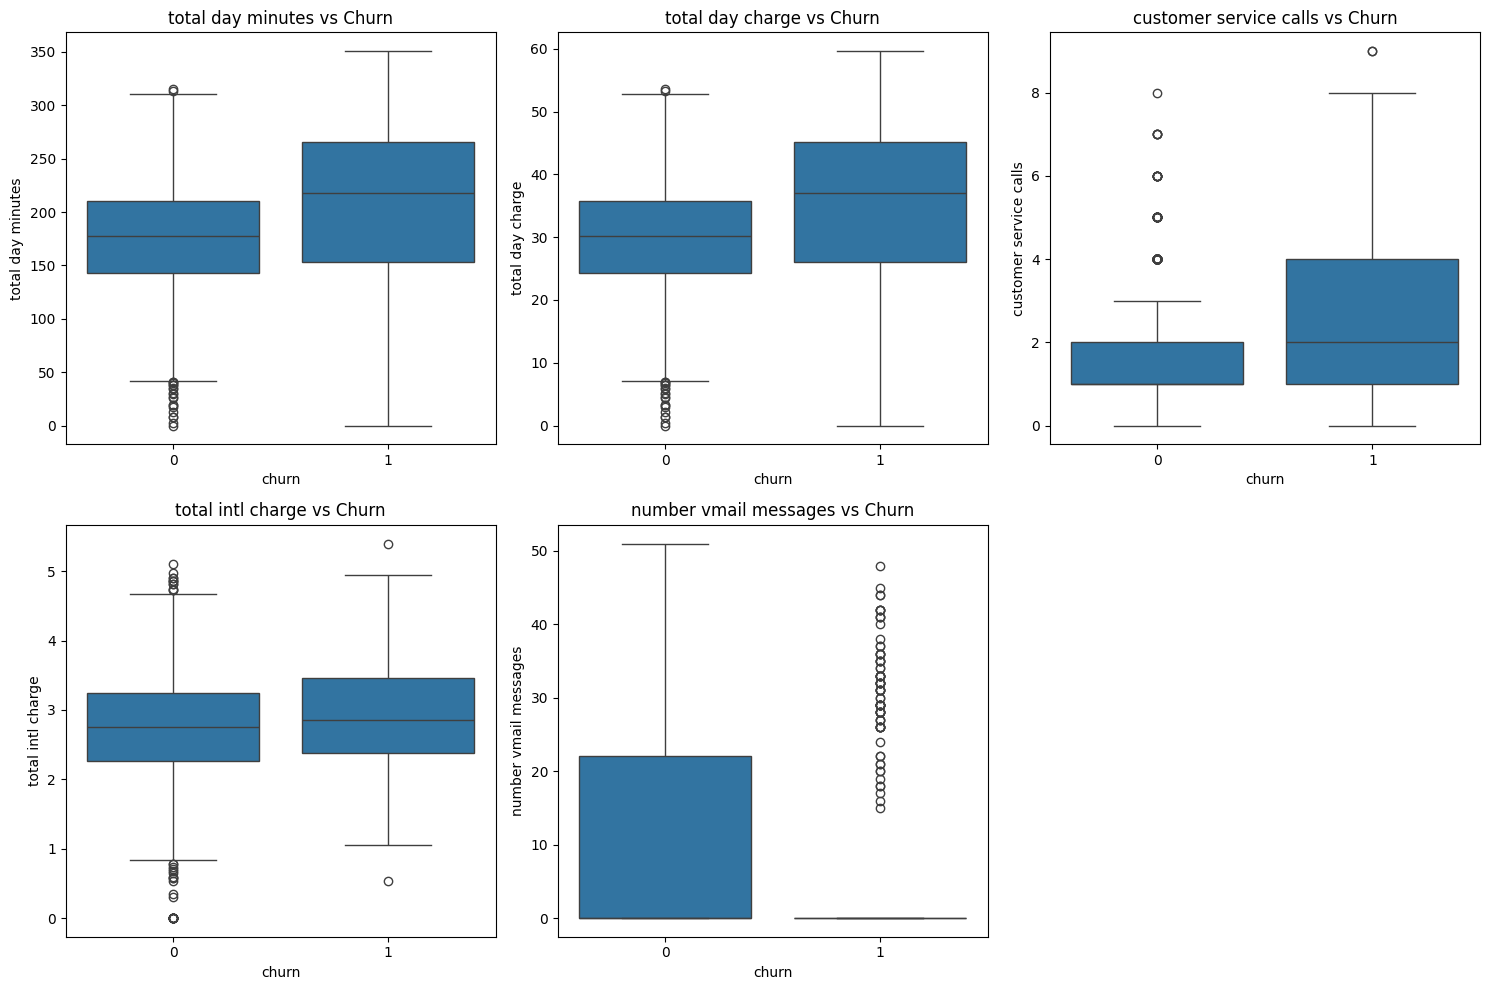

In [944]:

# Boxplots of numerical features vs churn

numerical_features = ['total day minutes', 'total day charge', 
'customer service calls', 'total intl charge',
'number vmail messages'
]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.show()

1. **total day minutes & charges**: Churners tend to have high daytime usage and charges.
2. **customer service calls**: Churners contact support more frequently, indicating dissatisfaction.
3. **international usage**: Slightly higher among churners especially in charges.
4. **voicemail messages**: Non-churners tend to use voice messages more, possibly indicating engagement.

#### Violin plots for features with high predictive values vs churn

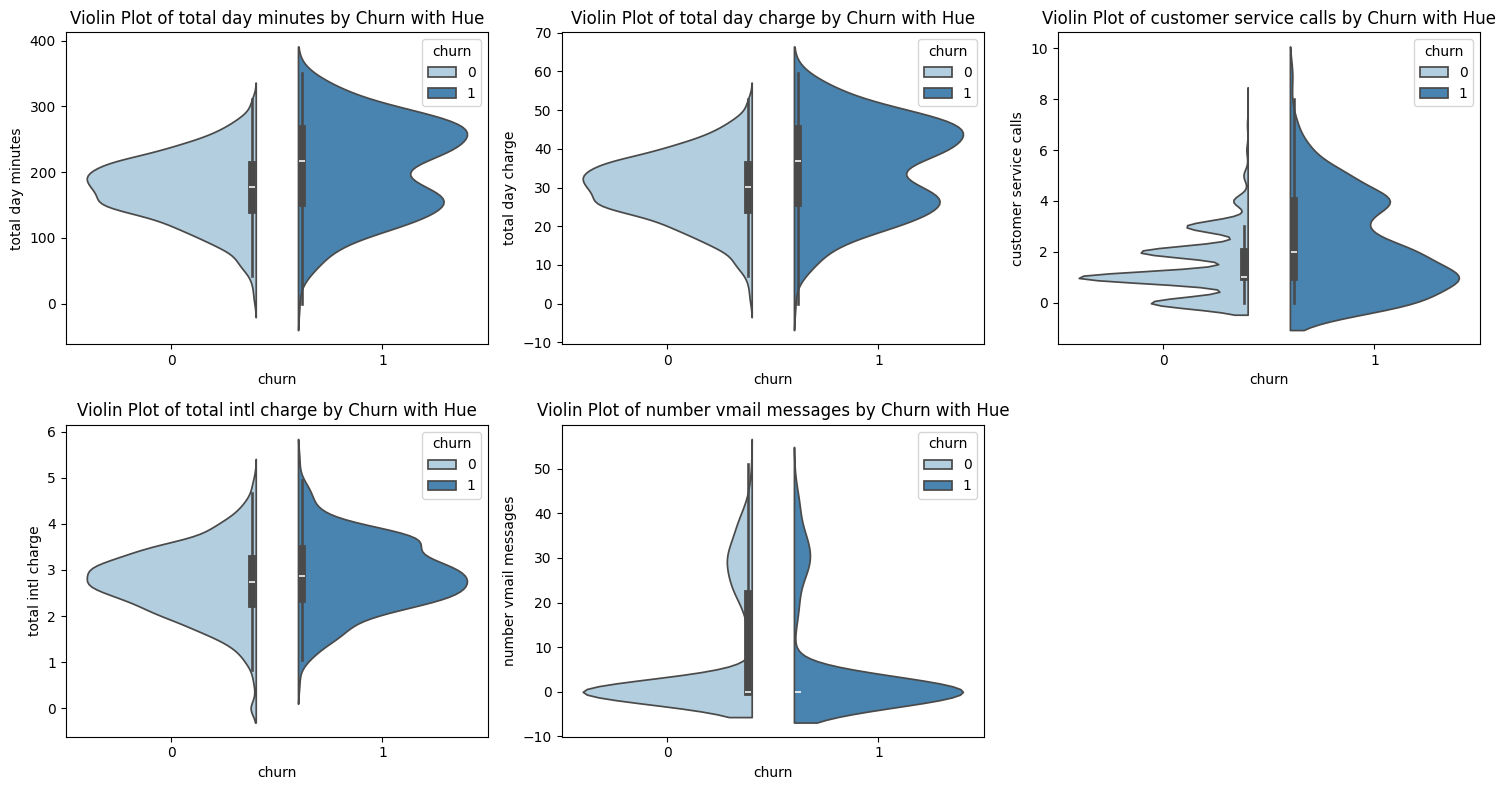

In [945]:
# Set up grid dimensions
num_features = len(numerical_features)
cols = 3
rows = math.ceil(num_features / cols)

# Create the plot grid
plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(x='churn', y=feature, hue='churn', data=data, palette="Blues", split=True)
    plt.title(f'Violin Plot of {feature} by Churn with Hue')

plt.tight_layout()
plt.show()

**Interpretation of Each Feature's Relationship with Churn:**\

+ **Total Day Minutes / Charge**

    Churned customers tend to have higher day minutes and charges.
    Indicates that heavy daytime users are more likely to churn.

+ **Total International Minutes / Calls / Charge**

    Churned customers show slightly higher international usage.
    Could suggest dissatisfaction with international call services or pricing.

+ **Customer Service Calls**

    Strong indicator: churned customers have a higher number of service calls.
    Suggests that poor customer service experiences are a major churn driver.

+ **Number of Voicemail Messages**

    Non-churned customers tend to use voicemail more.
    Possibly indicates higher engagement or satisfaction.

### correlation heatmap
This shows how features are correlated with each other and with churn.

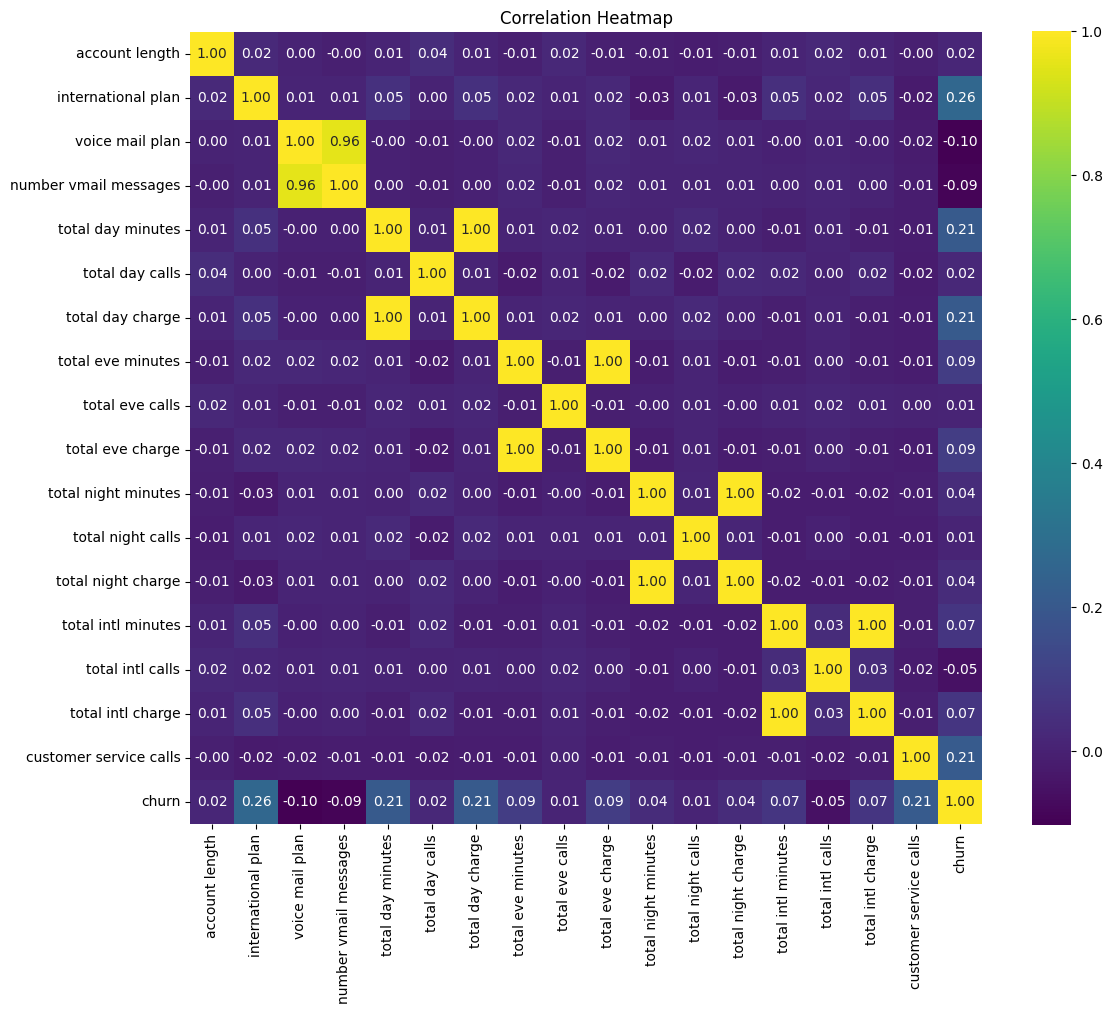

In [946]:

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

+ Churn is positively correlated with:
* customer service calls.
* total day minutes and total day charge.
* international plan.
+ Churn is negatively correlated with:
* voicemail plan
* number of voice messages
* total international call


#### Categorical feature impact

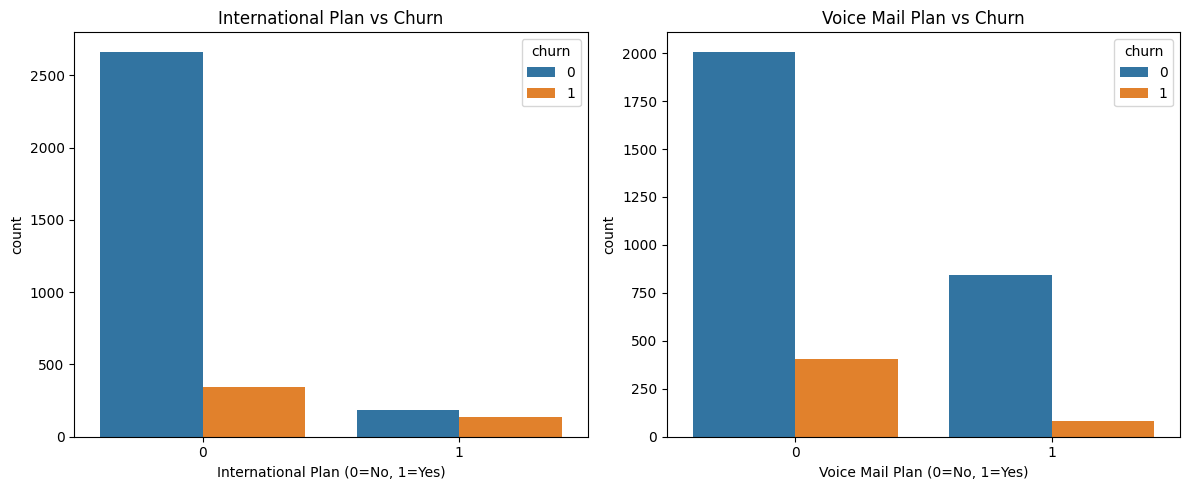

In [947]:

# Count plots for categorical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=data)
plt.title("International Plan vs Churn")
plt.xlabel("International Plan (0=No, 1=Yes)")

plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.title("Voice Mail Plan vs Churn")
plt.xlabel("Voice Mail Plan (0=No, 1=Yes)")

plt.tight_layout()
plt.show()

* Customers with an international plan are more likely to churn.
* Customers with a voice-mail plan are less likely to churn.

Visualize the imbalance in the churn variable using both a bar plot and a pie chart:

1. This bar plot below shows the absolute number of customers who churned 
    vs.those who didn’t

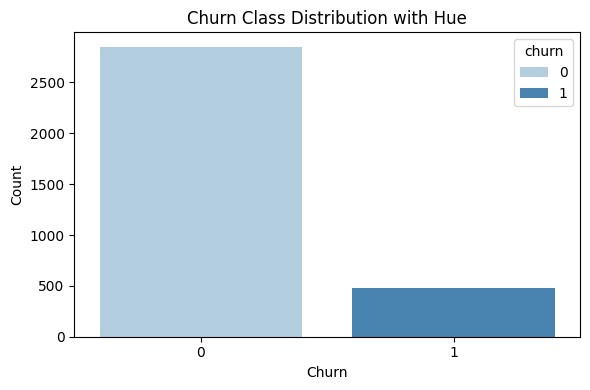

In [948]:
# Count the occurrences of each class
churn_counts = data['churn'].value_counts()

# Create a bar plot with hue to distinguish churn classes
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', hue='churn', data=data, palette='Blues')
plt.title('Churn Class Distribution with Hue')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

2. The pie chart below illustrates the proportion of churned vs. non-churned
    customers, highlighting the imbalance.

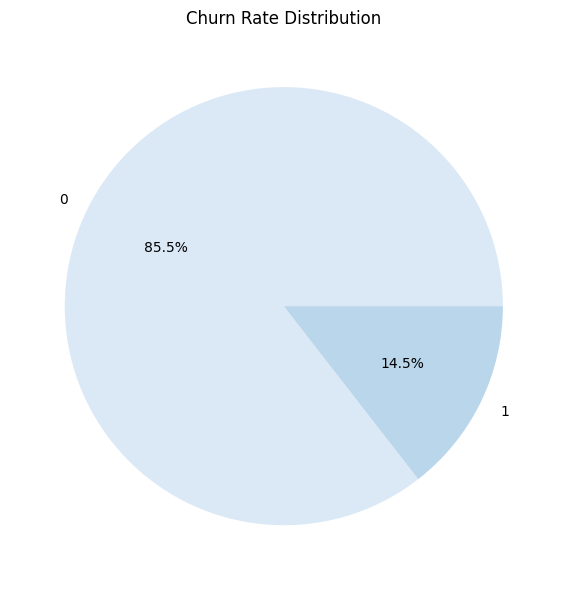

In [949]:
# Pie chart for churn rate
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Churn Rate Distribution')
plt.tight_layout()
plt.show()

+ The dataset is imbalanced, with a significantly higher number of non-churned
    customers.
+ This imbalance can affect model performance, especially for classification
    tasks, and may require using evaluation metrics such as F1-score or AUC.

#### Choose Predictors and the target
Predictors will be the numerical columns and categorical columns.
The target is churn

In [950]:
#Choose our predictors and target
X = data.drop(columns="churn")
y = data["churn"]

#### Scale Features

In [951]:
#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Divide the dataset into training and testing sets for the model.

In [952]:
#split our data into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelling and Evaluation

1. Logistic Regression will be our baseline model, because:
* churn is binary, making logistic regression a natural fit.
* It's fast to train and deploy.
* It will give probabilities of churn, which can be used to rank customers by risk level.
* Provides clear coefficients that show the direction and strength of each feature's impact on churn.

2. Random Forest
* Able to capture complex relationships that logistic regression might miss.
* It's less sensitive to outliers and irrelevant features making it more robust for real-world data.
* Provides feature importance scores, which will help SyriaTel understand which features most influence churn.
* Typically achieves higher accuracy and recall which is crucial for identifying churners early.

### 1. Logistic Regression

In [953]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print('Intercept:', log_model.intercept_)
print('Coefficients:', log_model.coef_)

Intercept: [-2.31121008]
Coefficients: [[ 0.02470776  0.61628852 -0.63420596  0.22769359  0.32685641 -0.00191179
   0.32729934  0.15397582  0.02993466  0.15263392  0.07117782 -0.02169096
   0.06980036  0.12585247 -0.26649466  0.13290785  0.66523912]]


#### Model Evaluation and interpretation

Cross-validation for Logistic Regression model on the SyriaTelCustomerChurn dataset:

In [954]:
# Evaluate model

log_pred = log_model.predict(X_test)
log_probs = log_model.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, log_pred)
print(f'Accuracy Score: {acc:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, log_pred))

# Feature importance
feature_names = X
coefs = log_model.coef_[0]
for name, coef in zip(X, coefs):
    print(f'{name}: {coef:.2f}')

Accuracy Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

account length: 0.02
international plan: 0.62
voice mail plan: -0.63
number vmail messages: 0.23
total day minutes: 0.33
total day calls: -0.00
total day charge: 0.33
total eve minutes: 0.15
total eve calls: 0.03
total eve charge: 0.15
total night minutes: 0.07
total night calls: -0.02
total night charge: 0.07
total intl minutes: 0.13
total intl calls: -0.27
total intl charge: 0.13
customer service calls: 0.67


Accuracy: 86%\
Precision: 58%\
Recall: 18%\
F1 Score: 27%\
Observations:\
The model is fairly accurate overall, but it struggles to recall churned customers (i.e., it misses many actual churn cases).
The low recall and F1 score suggest that the model is biased toward predicting the majority class (non-churn), which is common in imbalanced datasets.

In [955]:
# Logistic Regression with L1 and L2
log_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']  # supports both l1 and l2
}
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='f1')
log_grid.fit(X_train, y_train)
log_best = log_grid.best_estimator_
log_pred = log_best.predict(X_test)

print("Logistic Regression Best Params:", log_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))

Logistic Regression Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.856071964017991
Precision: 0.5806451612903226
Recall: 0.1782178217821782
F1 Score: 0.2727272727272727


In [956]:

# Confusion Matrix
log_cm = confusion_matrix(y_test, log_pred)


Text(120.72222222222221, 0.5, 'Actual')

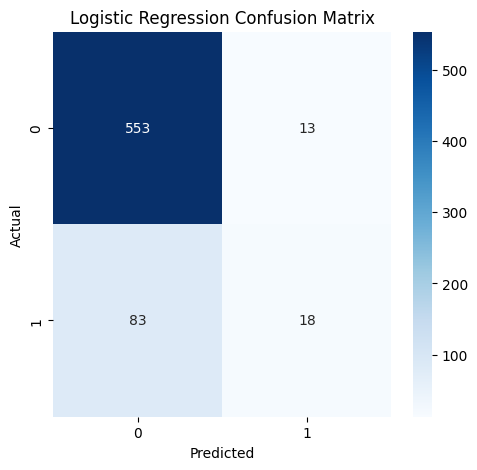

In [957]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


+ True Negatives (TN = 553): Customers correctly identified as not churning.
+ False Positives (FP = 13): Customers incorrectly predicted to churn.
+ False Negatives (FN = 83): Customers who churned but were not identified by the model.
+ True Positives (TP = 18): Customers correctly predicted to churn.

#### Key Takeaways:
* The model is very good at identifying non-churners (high TN).
However, it misses many actual churners (high FN), which is reflected in the low recall.
This makes the model conservative — it avoids false alarms but at the cost of missing many churners.

In [958]:
# ROC curve
log_tpr, log_fpr, _ =roc_curve(y_test, log_probs)
log_auc = auc(log_tpr, log_fpr)

In [959]:
##### Area under the curve
log_auc

0.8330301228002658

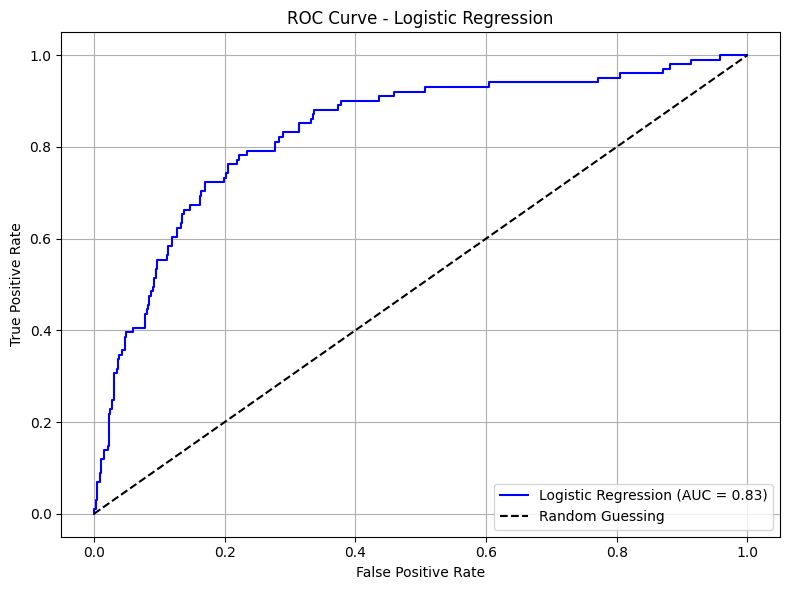

In [960]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(log_tpr, log_fpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



* The AUC (Area Under Curve) for Logistic Regression is 0.84, which is considered very good
* Even though the confusion matrix shows low recall, the ROC curve suggests that with a different threshold, the model could perform better in identifying churners (strong class separation ability).

### 2. Random Forest

In [961]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


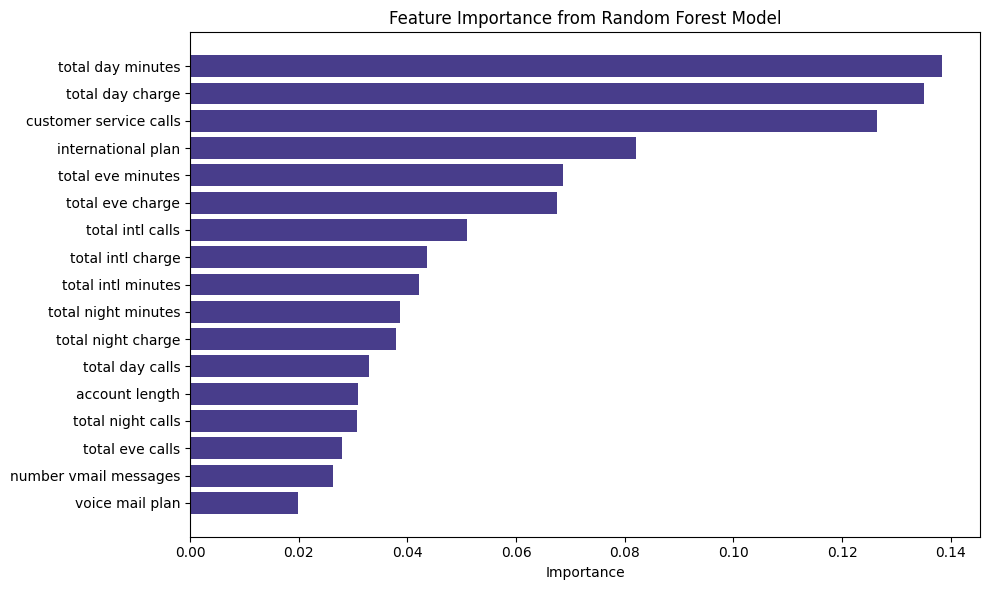

In [962]:
# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkslateblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

* The model relies heavily on usage behavior and customer support interactions to predict churn.
* Billing-related features (charges) are also key indicators.
* Plan types (like international or voicemail) influence churn but to a lesser extent.

### Model Evaluation and interpretation

5-fold cross-validation using a Random Forest Classifier on the SyriaTelCustomerChurn dataset

In [963]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, rf_pred)
print(f'Accuracy Score: {acc:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, rf_pred))

Accuracy Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.92      0.71      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.94       667



Accuracy: 95%\
Precision: 92%\
Recall: 72%\
F1 Score: 81%\
Interpretation:\
The model is highly accurate and precise, meaning it correctly identifies most non-churn cases and avoids false positives.
However, the recall is lower, indicating it misses some actual churn cases.
The F1 score balances precision and recall, showing overall good performance.

In [964]:
# Random Forest (no scaling needed)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)

print("\nRandom Forest Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))


Random Forest Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9490254872563718
Precision: 0.9240506329113924
Recall: 0.7227722772277227
F1 Score: 0.8111111111111111


In [965]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)

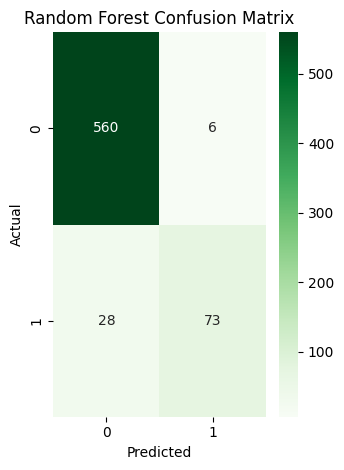

In [966]:
# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

* True Negatives (TN = 560): Non-churners correctly identified.
* False Positives (FP = 6): Non-churners incorrectly predicted to churn.
* False Negatives (FN = 29): Churners missed by the model.
* True Positives (TP = 72): Churners correctly identified.

+ Key Takeaways:
* The model is highly accurate in identifying both churners and non-churners.
* Very low false positives — excellent for avoiding unnecessary retention efforts.
* High true positives — captures most churners, making it effective for proactive retention.

In [967]:
# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_auc = auc(rf_fpr, rf_tpr)

In [968]:
rf_auc

0.9380400937620265

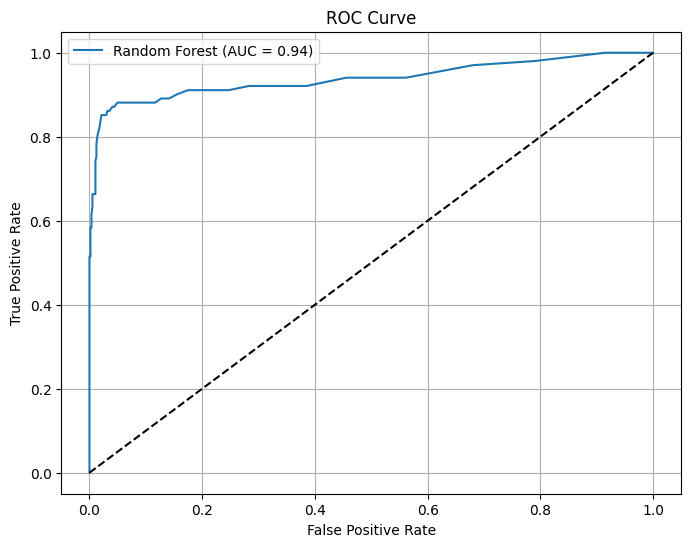

In [969]:
 # Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Comparisons

In [970]:
# ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
log_auc = auc(log_fpr, log_tpr)
rf_auc = auc(rf_fpr, rf_tpr)


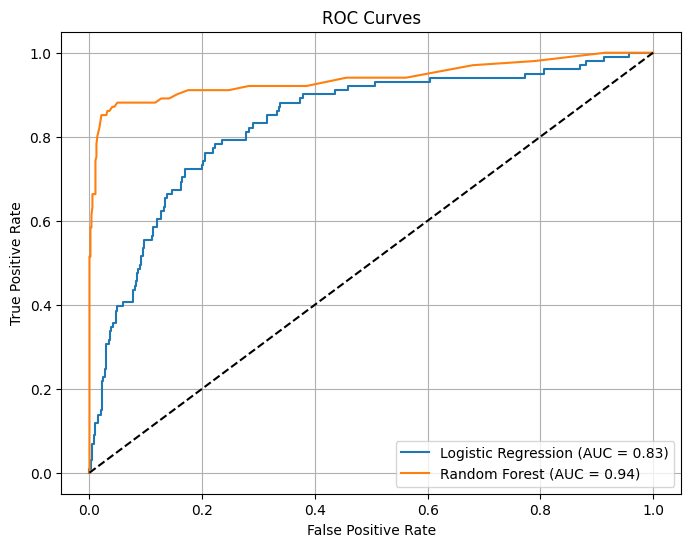

In [971]:

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

**ROC Curves**
+ The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate.
+ The AUC (Area Under Curve) indicates model performance:
    1.0 = perfect
    0.5 = random guessing

**AUC Scores:**
+ Logistic Regression: 0.84
+ The ROC curve for Random Forest shows a steep rise toward the top-left corner.
* The AUC (Area Under Curve) is 0.94, which is excellent.

**Interpretation**\
**Logistic Regression**\
Strengths: High precision for non-churners, interpretable.\
Weaknesses: Misses many actual churners (low recall).\
Use Case: Conservative churn detection — better when false positives are costly.\
**Random Forest**\
Strengths: Excellent balance of precision and recall, high AUC.\
Weaknesses: Slightly more complex to interpret.\
Use Case: Best for proactive churn management — identifies most churners accurately.

### Conclusions


For Syriatel's churn prediction needs, Random Forest is the most effective model due to its high accuracy. Its True positive (TP) value is higher than the one for logistic regression making it better at identifying churners. Its False Negative (FN) value is also relatively lower hence misses few churners.
